<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from pycaret.regression import *
from pycaret.utils import version
version()

'3.0.4'

In [ ]:
from pycaret.datasets import get_data
all_datasets = get_data('index')
dataset = get_data('bike')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
dataset.info()
dataset = dataset.sample(5000)
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 9895 to 15722
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     5000 non-null   int64  
 1   dteday      5000 non-null   object 
 2   season      5000 non-null   int64  
 3   yr          5000 non-null   int64  
 4   mnth        5000 non-null   int64  
 5   hr          5000 non-null   int64  
 6   holiday     5000 non-null   int64  
 7   weekday     5000 non-null   int64  
 8   workingday  5000 non-null   int64  
 9   weathersit  5000 non-null   int64  
 10  temp        5000 non-null   float64
 11  atemp       5000 non-null   float64
 12  hum         5000 non-null   float64
 13  windspeed   5000 non-null   float64
 14  cnt         5000 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 754.0+ KB
Data for Modeling: (4500, 15)
Unseen Data For Predictions: (500, 15)


instant       4500
dteday         730
season           4
yr               2
mnth            12
hr              24
holiday          2
weekday          7
workingday       2
weathersit       4
temp            48
atemp           60
hum             84
windspeed       25
cnt            684
dtype: int64

In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
categoricals = ['season', 'yr', 'mnth', 'hr','holiday', 'weekday','workingday','weathersit' ]
numericals   = ['temp', 'atemp', 'hum', 'windspeed']
ignore       = ['instant','dteday']

In [ ]:
exp_one = RegressionExperiment()
exp_one.setup(data, ignore_features=ignore,  target='cnt', session_id=555, train_size=0.7,
              preprocess=False, categorical_features=categoricals, numeric_features=numericals)

exp_two = RegressionExperiment()
exp_two.setup(data, ignore_features=ignore, target='cnt', session_id=555, train_size=0.7,
              categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean',
              categorical_imputation='mode', preprocess=True, normalize=True , remove_outliers=True,
              ordinal_features=None)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(4500, 15)"
4,Transformed data shape,"(4500, 13)"
5,Transformed train set shape,"(3150, 13)"
6,Transformed test set shape,"(1350, 13)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(4500, 15)"
4,Transformed data shape,"(4342, 58)"
5,Transformed train set shape,"(2992, 58)"
6,Transformed test set shape,"(1350, 58)"
7,Ignore features,2
8,Ordinal features,3
9,Numeric features,4


In [ ]:
top_three_exp_one = exp_one.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,29.5354,2154.5369,46.2938,0.9323,0.4602,0.4634,0.2000
xgboost,Extreme Gradient Boosting,30.7110,2196.6105,46.7225,0.9307,0.4979,0.5292,0.3500
et,Extra Trees Regressor,32.5169,2508.2012,49.9246,0.9212,0.4266,0.4477,0.4520
rf,Random Forest Regressor,34.3276,2942.7856,54.1113,0.9070,0.4267,0.4238,0.5360
gbr,Gradient Boosting Regressor,48.3727,5007.3139,70.5495,0.8437,0.6888,0.9642,0.2290
dt,Decision Tree Regressor,43.4638,5018.0606,70.5870,0.8413,0.5285,0.4980,0.0780
knn,K Neighbors Regressor,46.9330,5380.1500,73.0342,0.8320,0.5007,0.5537,0.0850
ada,AdaBoost Regressor,96.1472,13234.5745,114.9075,0.5834,1.1900,3.6312,0.1860
br,Bayesian Ridge,105.4515,19890.4978,140.7346,0.3786,1.2107,3.4435,0.0790
ridge,Ridge Regression,105.4845,19892.5164,140.7440,0.3785,1.2102,3.4475,0.1050


In [ ]:
top_three_exp_two = exp_two.compare_models(n_select=3, include=["xgboost", "lightgbm", "ada", "et", "rf", "gbr", "dt", "knn"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,36.4241,2932.3540,53.9643,0.9084,0.6403,0.8700,0.6510
lightgbm,Light Gradient Boosting Machine,36.3524,2921.4605,53.8764,0.9084,0.6454,0.8549,0.1820
et,Extra Trees Regressor,36.0867,3376.8445,57.6304,0.8950,0.5096,0.5954,0.2510
rf,Random Forest Regressor,44.7156,4343.7158,65.6347,0.8646,0.6871,1.0676,0.2090
gbr,Gradient Boosting Regressor,59.7497,6923.6895,82.9690,0.7840,0.8253,1.4925,0.1790
dt,Decision Tree Regressor,58.8863,8851.9816,93.6323,0.7232,0.7895,1.0195,0.1840
knn,K Neighbors Regressor,64.8258,9172.7821,95.5187,0.7117,0.6647,0.9519,0.4590
ada,AdaBoost Regressor,115.0767,18691.4669,136.6890,0.4106,1.4852,6.8080,0.1960


In [ ]:
top_three_exp_one

[LGBMRegressor(random_state=555),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=555, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=555)]

In [ ]:
top_three_exp_two

[LGBMRegressor(random_state=555),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=555, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=555)]

In [ ]:
xgb_reg = exp_one.create_model('xgboost', return_train_score = True)

In [ ]:
lgbs  = [exp_two.create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,0.5,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.2863,2628.6457,51.2703,0.9151,0.6718,0.9132
1,32.4620,2187.0648,46.7661,0.9340,0.6294,0.8766
2,37.6197,3036.7445,55.1067,0.9215,0.5793,0.7547
3,33.8116,2379.0578,48.7756,0.9071,0.7512,1.1096
4,37.5626,3398.7768,58.2990,0.8934,0.6726,0.8153
5,36.9786,2932.2165,54.1499,0.9028,0.6655,0.9584
6,36.9500,2869.6915,53.5695,0.9056,0.6551,0.9552
7,40.1581,3968.4491,62.9956,0.8920,0.6367,0.7766
8,35.1203,2872.0845,53.5918,0.9087,0.5467,0.6326


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.9591,2662.0628,51.5952,0.9141,0.6746,0.9165
1,33.0361,2107.1017,45.9032,0.9365,0.5955,0.9083
2,38.5881,3162.2681,56.2340,0.9182,0.6175,0.8355
3,34.2711,2378.8285,48.7732,0.9071,0.7201,1.0950
4,37.9254,3219.2369,56.7383,0.8990,0.6459,0.8073
5,35.9361,2809.7956,53.0075,0.9068,0.6236,0.9148
6,36.1868,2704.3609,52.0035,0.9110,0.6511,0.9345
7,40.3459,3740.3035,61.1580,0.8982,0.6328,0.9971
8,36.5562,3119.2237,55.8500,0.9008,0.6267,0.8177


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.3304,2950.8883,54.3221,0.9047,0.6762,1.0209
1,35.0574,2316.4584,48.1296,0.9301,0.6977,1.1551
2,38.7455,3139.3294,56.0297,0.9188,0.6702,0.9765
3,36.7502,2736.7498,52.3140,0.8932,0.8158,1.4301
4,40.5895,3469.8161,58.9051,0.8912,0.7356,0.9969
5,39.1676,3014.1888,54.9016,0.9000,0.7139,1.1187
6,37.2823,2708.8382,52.0465,0.9109,0.6727,1.0835
7,40.9796,3849.2681,62.0425,0.8953,0.6299,0.8897
8,37.9090,3152.4680,56.1468,0.8997,0.6459,0.9569


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.3704,2991.6762,54.6962,0.9034,0.7901,1.2500
1,38.2365,2638.5141,51.3665,0.9204,0.7412,1.4464
2,42.4954,3474.7990,58.9474,0.9101,0.6854,0.9711
3,37.9433,2699.3030,51.9548,0.8946,0.8467,1.5595
4,43.4813,3922.7582,62.6319,0.8770,0.7192,1.0718
5,41.3551,3322.3692,57.6400,0.8898,0.7715,1.4625
6,38.7512,2867.8191,53.5520,0.9056,0.6928,1.0459
7,39.9603,3715.1639,60.9521,0.8989,0.6390,0.9935
8,39.3423,3363.6388,57.9969,0.8930,0.6716,0.9410


In [ ]:
tune_xgb_reg = exp_one.tune_model(xgb_reg, return_train_score = True, n_iter = 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


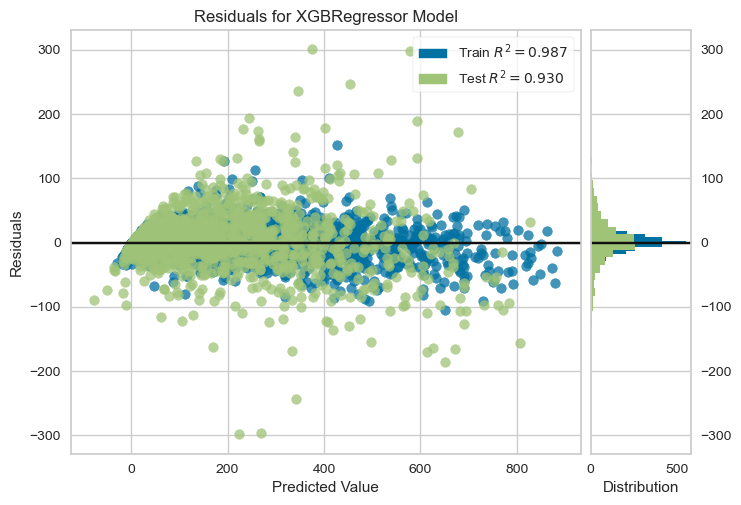

In [ ]:
exp_one.plot_model(tune_xgb_reg)

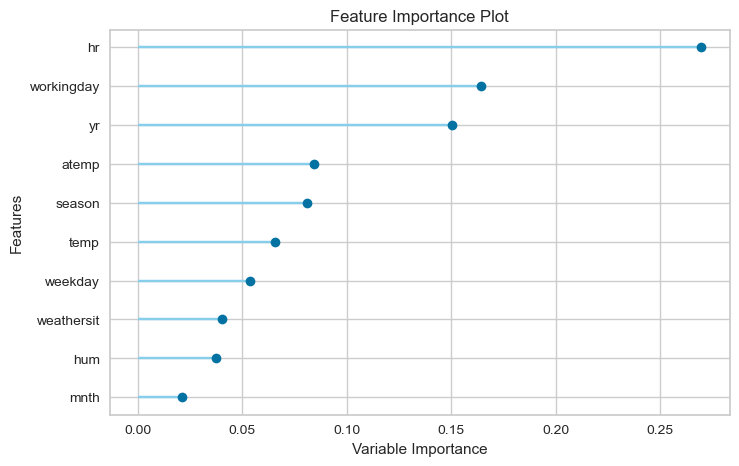

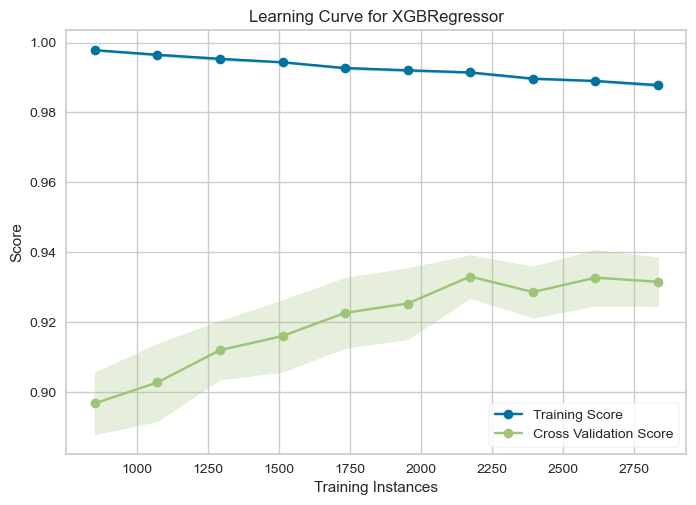

In [ ]:
exp_one.plot_model(tune_xgb_reg, plot = 'feature')
exp_one.plot_model(tune_xgb_reg, plot = 'learning')

In [ ]:
xgb_pred = exp_one.predict_model(tune_xgb_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,30.3506,2225.2032,47.1721,0.9304,0.4907,0.5575


In [ ]:
xgb_model = exp_one.finalize_model(tune_xgb_reg)
unseen_predictions = exp_one.predict_model(xgb_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,31.7697,2502.1943,50.0219,0.9316,0.5319,0.5756
